<a href="https://colab.research.google.com/github/tdack21/cosmologia_ml/blob/main/Tarea_6_cosmoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import optimize


from matplotlib import animation, rc
#from IPython.display import HTML
%matplotlib inline
sb.set()

In [ ]:
H0     = 0.7

Ocb    = 0.32
Ok     = 0.0
Omrad  = 0.0001
Ode    = 1 - Ocb - Ok
zvals  = np.linspace(0, 2.5, 300)

def hub(z, Ocb=0.32):
    #H**2/H0**2
    rhow = Ode
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1-Ocb)*rhow

In [ ]:
all_z  = []
all_hz = []
all_Ocb= []
for i in np.linspace(0.1, 1, 10):
    all_Ocb.append(i)
    all_z.append(np.linspace(0, 2.5, 300))
    all_hz.append([100*H0*hub(z, i)**0.5 for z in zvals])

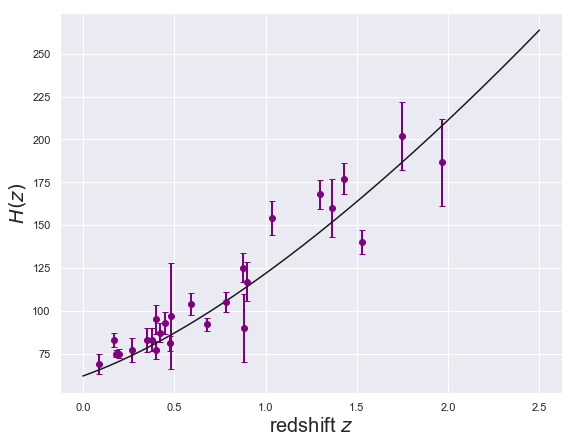

In [ ]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub(z, 0.32)**0.5 for z in zvals], 'k-')


dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

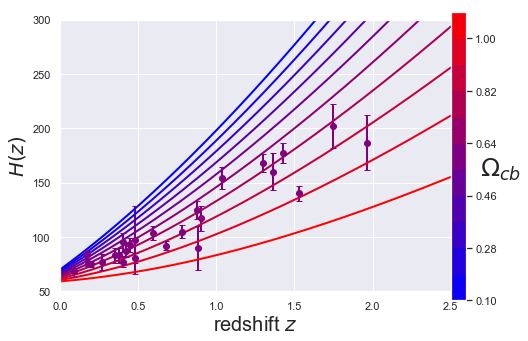

In [ ]:
fig = plt.figure(figsize=(7.,5))
ax1 = fig.add_subplot(111)

a = np.array(all_Ocb)
min, max = (a.min(), a.max())
step     = (max-min)/len(a)

mymap    = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
Z        = [[0,0],[0,0]]
levels   = np.arange(min, max+step, step)
CS3      = plt.contourf(Z, levels, cmap=mymap)

all_data = zip(all_z, all_hz, all_Ocb)


for x,y,z in all_data:
    b = (float(z)-min)/(max-min)
    r,g = 1-b, 0
    ax1.plot(x,y,color=(r,g,b), lw=2.)


dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.axis((0, 2.5 , 50, 300))

cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cbar   = plt.colorbar(CS3, cax = cbaxes)
cbar.set_label('$\Omega_{cb}$', rotation=0, fontsize=25)
plt.grid()

plt.show()

## Funcion de correlacion

**Ejercicio : leer datos 'dr14_lyalya_monopole.txt'.**

In [5]:
df = pd.read_csv('dr14_lyalya_monopole.txt',  sep='\s+')
...
df.head()

,r,xi,error
0,2.0,0.010298,0.000184
1,6.0,0.002726,0.000052
2,10.0,0.001441,0.000031
3,14.0,0.000831,0.000021
4,18.0,0.000514,0.000016


**Ejercicio 1: $r^2\xi$.**

In [6]:
df['r2xi'] = df['r']**2 * df['xi']
df['r2error'] = df['r']**2 * df['error']
df = df.set_index('r', drop=False)
...
df.head()

,r,xi,error,r2xi,r2error
r,,,,,
2.0,2.0,0.010298,0.000184,0.041191,0.000738
6.0,6.0,0.002726,0.000052,0.098139,0.001865
10.0,10.0,0.001441,0.000031,0.144063,0.003056
14.0,14.0,0.000831,0.000021,0.162789,0.004143
18.0,18.0,0.000514,0.000016,0.166543,0.005192


**Ejercicio 2: graficarlos.**

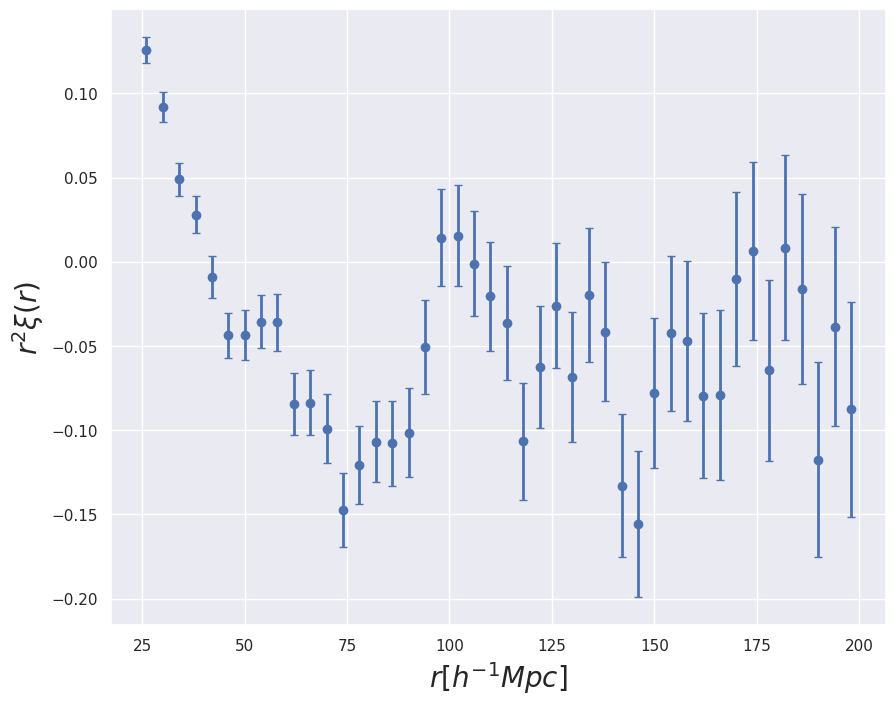

In [17]:
df_subset = df.iloc[6:]
plt.figure(figsize=(10, 8))
plt.errorbar(df_subset['r'], df_subset['r2xi'], yerr=df_subset['r2error'], xerr=None,
    marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
plt.ylabel('$r^2\\xi(r)$', fontsize=20)
plt.xlabel('$r[h^{-1}Mpc]$', fontsize=20)
plt.show()

## Covariance

**$error\_bar^2==covariance$.**

**Ejercicio 3: Leer datos 'dr14_lyalya_monopole.cov' y escribirlos como matriz de 50 x 50.** Solo informativo -- trabajaremos con errores anteriores.

In [8]:
covariance = np.loadtxt('dr14_lyalya_monopole.cov')
covariance = covariance[:,2].reshape(50, 50)
covariance


array([[ 3.40098445e-08,  3.46819846e-09,  5.93667410e-10, ...,
        -9.01238459e-13, -1.70806758e-12, -7.52556157e-13],
       [ 3.46819846e-09,  2.68277433e-09,  7.98799284e-10, ...,
        -4.27019648e-13, -6.17998310e-13, -6.36622211e-13],
       [ 5.93667410e-10,  7.98799284e-10,  9.33827466e-10, ...,
        -2.66760654e-13, -3.89501082e-13, -4.88237409e-13],
       ...,
       [-9.01238459e-13, -4.27019648e-13, -2.66760654e-13, ...,
         2.58698341e-12,  1.12764667e-12,  3.33790752e-13],
       [-1.70806758e-12, -6.17998310e-13, -3.89501082e-13, ...,
         1.12764667e-12,  2.47978033e-12,  1.16512973e-12],
       [-7.52556157e-13, -6.36622211e-13, -4.88237409e-13, ...,
         3.33790752e-13,  1.16512973e-12,  2.64780398e-12]])

**Ejercicio 4: Graficarla.**

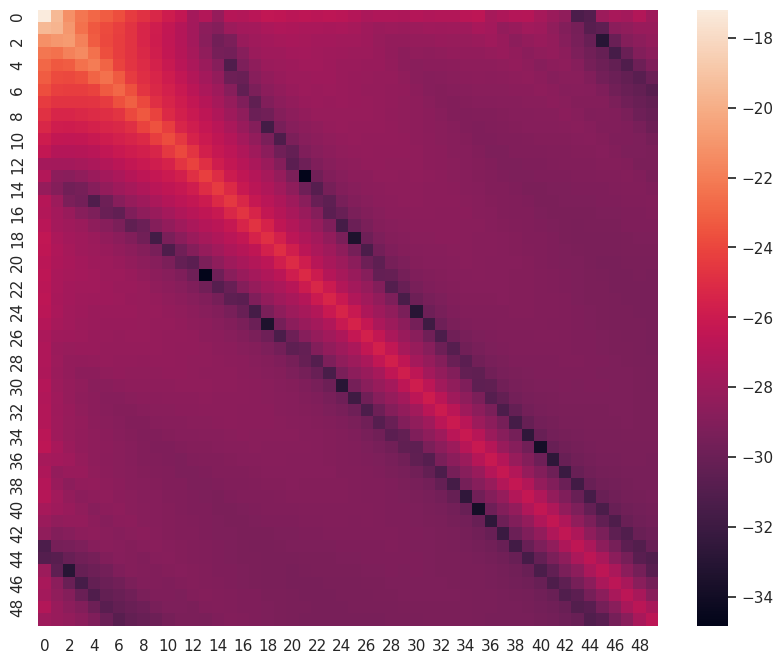

In [9]:
plt.figure(figsize=(10, 8))
sb.heatmap(np.log(abs(covariance)))
plt.show()


## The theory

### $\xi(r) = Ar^{-2} + polynomials(r) + Gaussian\_for\_BAO(\alpha r)$

**Ejercicio 5: (para los datos del ejercicio 1) proponer una teoria para ajustarla, guardar valores para despues comparar**

<Axes: xlabel='r'>

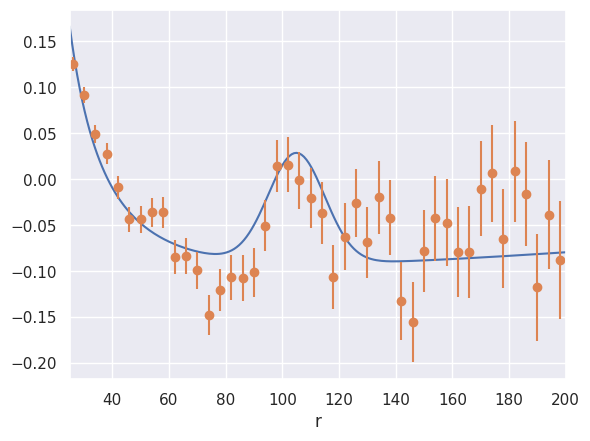

In [33]:
plt.figure()
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = 105
A     = 3.

def f(x, d, b, c):
    return d + b*x + c*x**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))

params, params_covariance = optimize.curve_fit(f, df_subset['r'], df_subset['r2xi'], sigma=df_subset['r2error'])

model =  params[0] + params[1]*r + params[2]*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

plt.plot(r, model)
df_subset['r2xi'].plot(yerr=df['r2error'], xlim=[25, 200], fmt='o')

**Ejercicio 6: crear sus propios datos y darselos a su compañero para identificar la teoria/modelo -- solo con la gaussiana -- En este caso usar 'new_dr14.csv'**

In [24]:
#dg = pd.DataFrame({'r':r, 'r2xi':function, 'r2error':error})
#dg.to_csv('new_dr14.csv', index=False)

## New data

In [35]:
# Ya sabemos que tiene un polinomio -0.18+ 0.0004*r + 250*r**(-2.)
# Solo queremos ajustar la gausiana

dq = pd.read_csv('new_dr14.csv',  sep=',')
...
dq.head(3)

,r,r2error,r2xi
0,26.0,0.007621,0.194600
1,30.0,0.008811,0.105661
2,34.0,0.009856,0.076605


**Ejercicio 7: usando los nuevos datos graficarlos.**

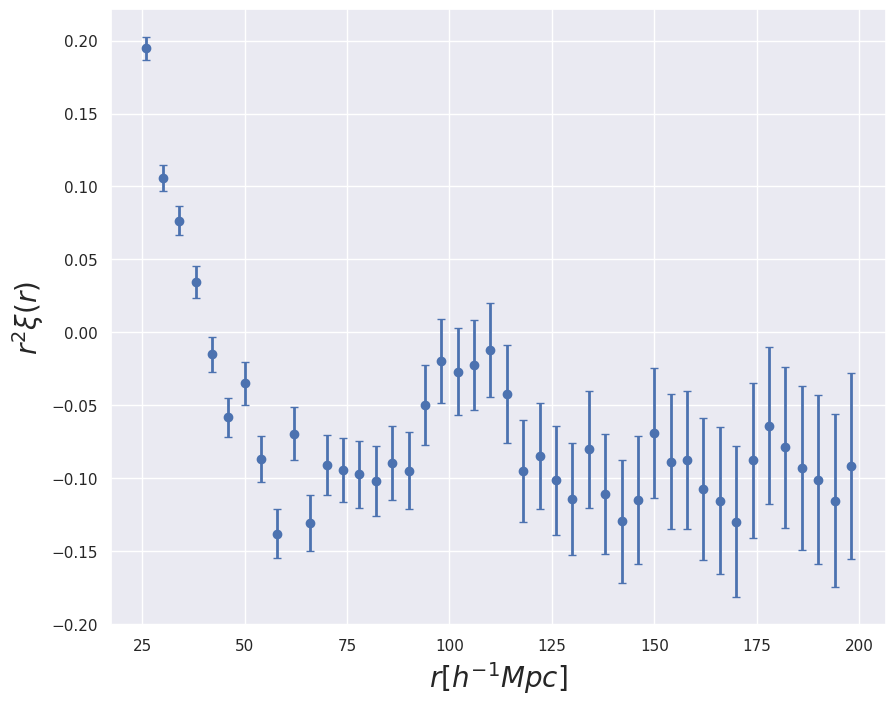

In [36]:
plt.figure(figsize=(10, 8))
plt.errorbar(dq['r'], dq['r2xi'], yerr=dq['r2error'], xerr=None,
    marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
plt.ylabel('$r^2\\xi(r)$', fontsize=20)
plt.xlabel('$r[h^{-1}Mpc]$', fontsize=20)
plt.show()

**Ejercicio 8: Dadas las barras de error, calcular matriz de covarianza.**

In [37]:
covariance_matrix = np.diag(dq['r2error']**2)
covariance = pd.DataFrame(covariance_matrix)
covariance.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.000058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000097,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000123,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000152,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Fit the function

In [71]:
def poli(r):
    return -0.18+ 0.0004*r + 250*r**(-2.)

def xi(r, mu=105, sigma=10, A=2.5):
    return poli(r) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

# Cuales valores de A, mu y sigma ajustan mejor

params, params_covariance = optimize.curve_fit(xi, dq['r'], dq['r2xi'], sigma=dq['r2error'], p0=[105, 10, 2])
params

array([104.62970366,   9.97212664,   2.56399542])

## Only with mu
**Ejercicio 9: construir un likelihood.**

In [87]:
def loglike(mu, sigma=params[1], A=params[2]):
    model = xi(dq['r'], mu, sigma, A)
    chisquare = np.sum((dq['r2xi'] - model)**2 / dq['r2error']**2)
    return -chisquare/2

**Ejercicio 10: Calcular loglike para diferentes valores de mu y graficar.**

In [89]:
mu_values = np.arange(80., 150., 5.)
probable  = [loglike(mu) for mu in mu_values]

Text(0.5, 0, '$\\mu$')

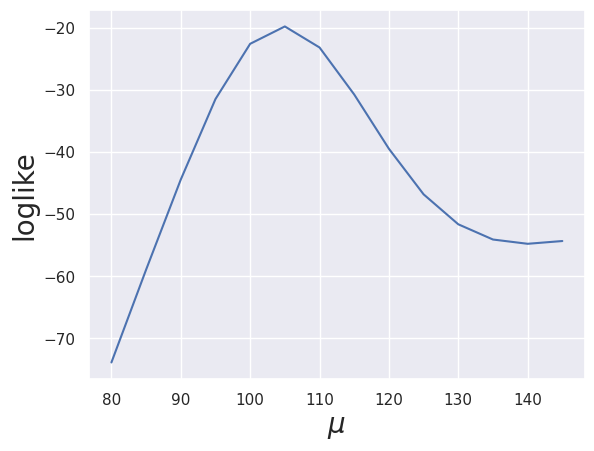

In [90]:
plt.plot(mu_values, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)

In [91]:
np.shape(covariance)

(44, 44)

## mu and sigma

**Ejercicio 11: Lo mismo pero para mu y sigma.**

In [92]:
def loglike(mu, sigma, A=params[2]):
    model = xi(dq['r'], mu, sigma, A)
    chisquare = np.sum((dq['r2xi'] - model)**2 / dq['r2error']**2)
    return -chisquare/2

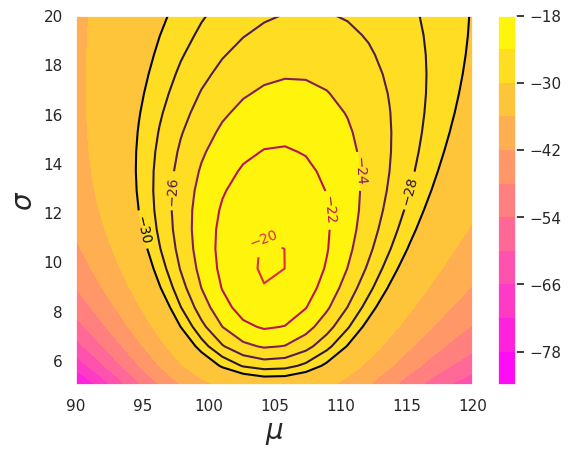

In [102]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 20)
y = np.linspace(5, 20, 20)

#grid = [map(lambda p: loglike(p, i), x) for i in y]
grid = np.array([[loglike(p, i) for p in x] for i in y])

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))
ax.clabel(CS, inline=10, fontsize=10)

plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

## Tma de Bayes

$P(\theta|D, H)=\frac{P(D|\theta,H)P(\theta|H)}{P(D|H)}.$

$P(D|H)=\int d^N\theta P(D|\theta,H)P(\theta|H),$

## Numeros Aleatorios

###  Método del cuadrado central (1946 John von Neumann)

In [172]:
seed = 1982
y = seed**2
y

3928324

**Ejercicio extra 12: separar el numero y solo tomar los cuatro digitos internos.**

In [173]:
digits =  [int(i) for i in str(y)]
if len(digits) % 2 == 0:
    rnumber = int(''.join([str(i) for i in digits[len(digits)//2-2:len(digits)//2+2]]))
else:
    rnumber = int(''.join([str(i) for i in digits[len(digits)//2-1:len(digits)//2+3]]))
rnumber

2832

**Ejercicio extra 13: Escribirlo como funcion para que tome ese numero interno como semilla y repetir el proceso hasta num=num.**

In [183]:
def ran_numbers(seed, num=1):
    random = []
    print (f' -- random numbers out of {seed} -- ')
    for i in np.arange(num):
        y = seed**2
        digits =  [int(j) for j in str(y)]
        if len(digits) % 2 == 0:
            rnumber = int(''.join([str(i) for i in digits[len(digits)//2-2:len(digits)//2+2]]))
        else:
            rnumber = int(''.join([str(i) for i in digits[len(digits)//2-1:len(digits)//2+3]]))
        seed = rnumber
        random.append(seed)
    return random

In [184]:
random = ran_numbers(1981, 100)
random[:10]

 -- random numbers out of 1981 -- 


[2436, 3409, 6212, 5889, 6803, 2808, 8486, 121, 4641, 5388]

**Ejercicio 14: que pasa con el numero inicial cuando elijo 100.**

**Ejercicio 15: que pasa con el numero inicial 3792.**

In [180]:
random = ran_numbers(100, 100)
random[:10]

 -- random numbers out of 100 -- 


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [181]:
random = ran_numbers(3792, 100)
random[:10]

 -- random numbers out of 3792 -- 


[3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792, 3792]

**Ejercicio 16 : Graficar numero aleatorios.**

 -- random numbers out of 1981 -- 


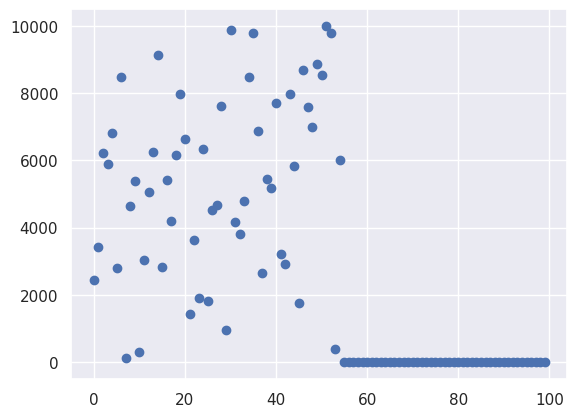

In [186]:
random = ran_numbers(1981, 100)
plt.plot(random, 'o')